In [17]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [12]:
df=pd.read_csv("/Users/ayaanhaq/Documents/Machine Learning/Bundesliga ML/Bundesliga Match Data/23_24.csv")

print(df.head())
print(df.columns)
print(df.info())

  Div        Date   Time       HomeTeam       AwayTeam  \
0  D1  18/08/2023  19:30  Werder Bremen  Bayern Munich   
1  D1  19/08/2023  14:30       Augsburg     M'gladbach   
2  D1  19/08/2023  14:30     Hoffenheim       Freiburg   
3  D1  19/08/2023  14:30     Leverkusen     RB Leipzig   
4  D1  19/08/2023  14:30      Stuttgart         Bochum   

   Full Time Home Team Goals  Full Time Away Team Goals Full Time Result  \
0                          0                          4                A   
1                          4                          4                D   
2                          1                          2                A   
3                          3                          2                H   
4                          5                          0                H   

   Half Time Home Goals  Half Time Away Team Goals  ...  \
0                     0                          1  ...   
1                     3                          3  ...   
2                

In [21]:
data= pd.DataFrame(df)
data.head()

,Div,Date,Time,HomeTeam,AwayTeam,Full Time Home Team Goals,Full Time Away Team Goals,Full Time Result,Half Time Home Goals,Half Time Away Team Goals,...,Home Team Shots on Target,Away Team Shots on Target,Home Team Fouls Committed,Away Team Fouls Commited,Home Team Corners,Away Team Corners,Home Team Yellow Cards,Away Team Yellow Cards,Home Team Red Cards,Away Team Red Cards
0,D1,18/08/2023,19:30,Werder Bremen,Bayern Munich,0,4,A,0,1,...,1,10,16,11,0,6,2,1,0,0
1,D1,19/08/2023,14:30,Augsburg,M'gladbach,4,4,D,3,3,...,8,6,9,14,8,7,1,2,0,0
2,D1,19/08/2023,14:30,Hoffenheim,Freiburg,1,2,A,0,2,...,5,8,9,9,4,2,0,1,0,0
3,D1,19/08/2023,14:30,Leverkusen,RB Leipzig,3,2,H,2,1,...,7,6,13,10,4,5,1,2,0,0
4,D1,19/08/2023,14:30,Stuttgart,Bochum,5,0,H,2,0,...,9,1,5,12,7,0,1,1,0,0


In [ ]:
X= df.drop(columns=["Full Time Result", "Half Time Result"])
y= df["Full Time Result"]

In [22]:
print(df.shape)

(306, 23)


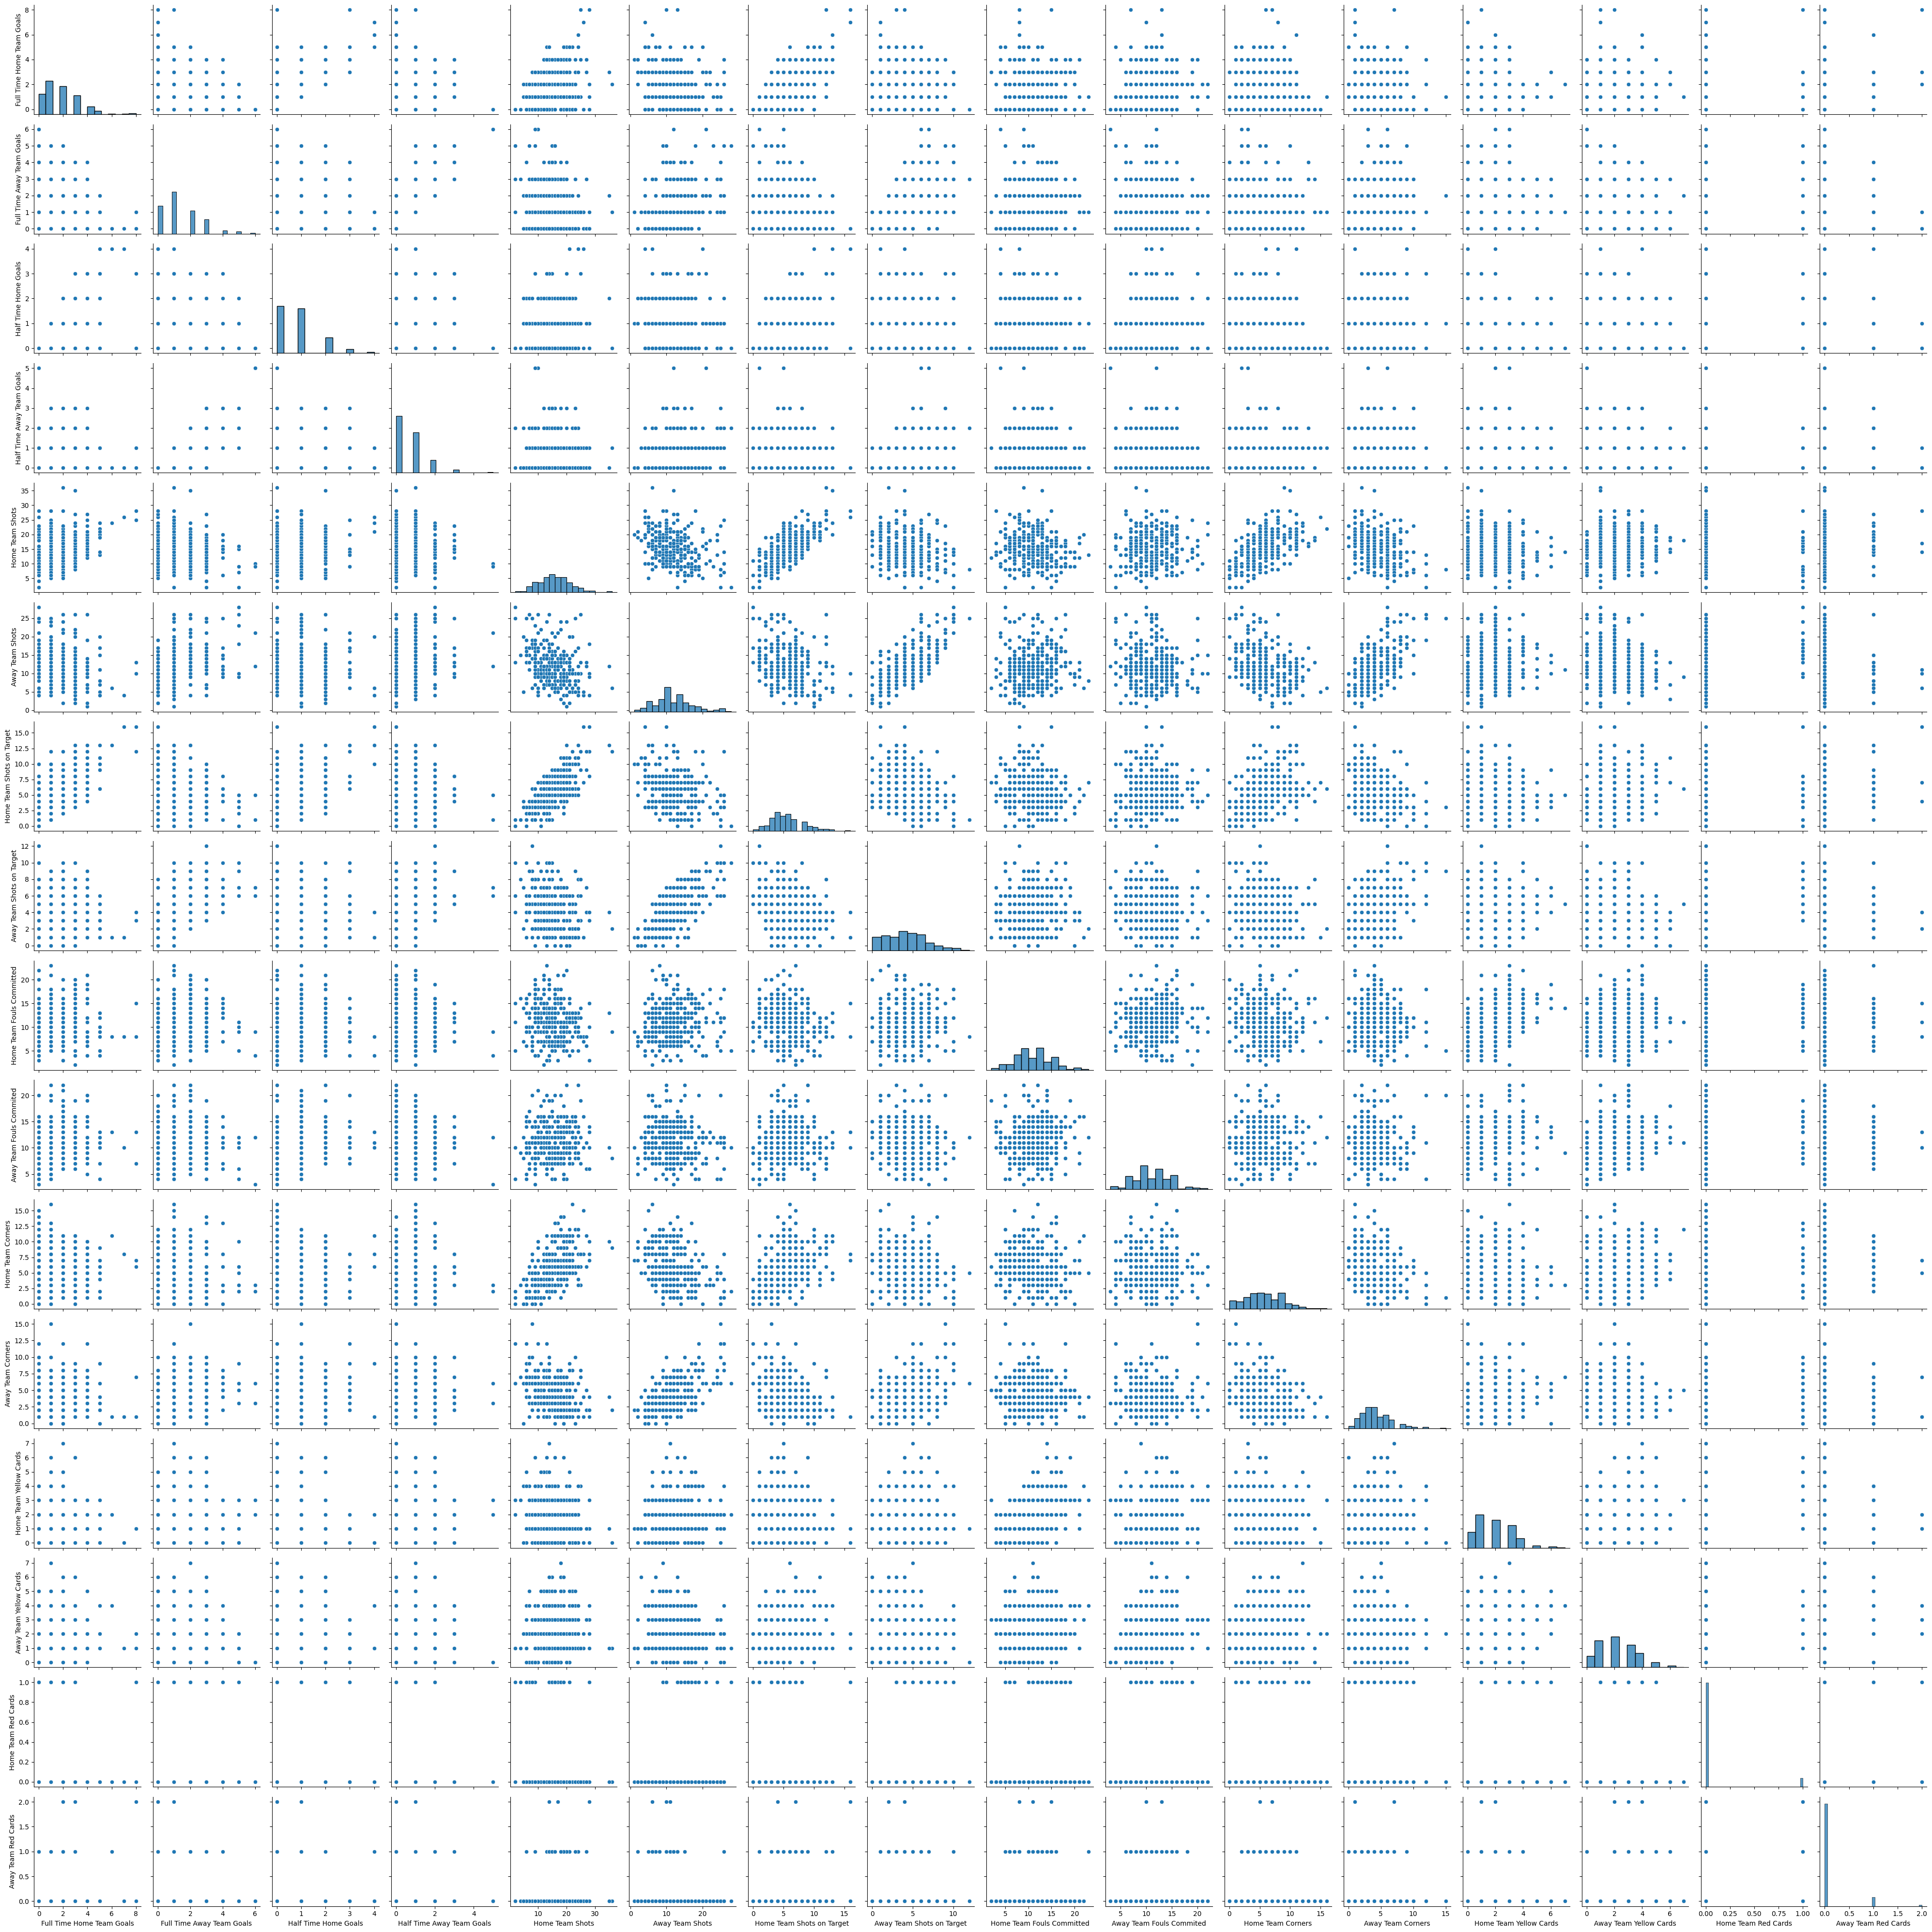

In [24]:
sns.pairplot(data, height=2.5)
plt.tight_layout()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X= df.drop(columns=["Div","Full Time Result", "Half Time Result","Date","Time","HomeTeam","AwayTeam"], axis=1)
y=df["Full Time Result"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
clf=RandomForestClassifier()
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
accuracy= clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.89


In [37]:
y_pred=clf.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report: ")
print(classification_report(y_test, y_pred))

Confusion matrix: 
[[17  2  0]
 [ 0 14  1]
 [ 0  4 24]]

Classification Report: 
              precision    recall  f1-score   support

           A       1.00      0.89      0.94        19
           D       0.70      0.93      0.80        15
           H       0.96      0.86      0.91        28

    accuracy                           0.89        62
   macro avg       0.89      0.90      0.88        62
weighted avg       0.91      0.89      0.89        62



In [39]:
comparison= pd.DataFrame({"Actual": y_test, "predicted": y_pred})
print(comparison.head(10))

    Actual predicted
85       H         H
142      A         A
265      H         H
155      H         D
201      D         D
104      H         H
76       A         A
232      A         A
119      H         H
259      A         A
